In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# IMPORTING OUR DATA

In [2]:
df_train = pd.read_csv("/Users/mobilegalery/Downloads/KDDTrain+.csv")
df_train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
df_test = pd.read_csv("/Users/mobilegalery/Downloads/KDDTest+.csv")
df_test

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
df_train.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

# Business Understanding Note

## Project Overview:

The project focuses on Network Intrusion Detection Systems (NIDS), which play a crucial role in identifying and preventing cybersecurity threats. The primary objective is to develop effective anomaly detection algorithms using Gaussian Mixture Models (GMMs) and a novel asymmetric voting scheme.

### Problem Statement:

As the number of connected devices grows exponentially, ensuring the security of networks becomes increasingly complex. Traditional rule-based protection mechanisms are insufficient, and Intrusion Detection Systems (IDS) are essential for detecting and mitigating security threats.

### Solution Approach:

The proposed solution leverages GMMs to model normal behavior in network traffic. Instead of using a single GMM, the approach employs multiple simple GMMs to model individual features. An asymmetric voting scheme aggregates these individual anomaly detectors, enhancing the overall detection capability.

### Dataset and Evaluation:

The NSL-KDD dataset is utilized for training and testing the proposed anomaly detection system. The normal behavior models are constructed using only samples labeled as normal. The performance is evaluated using the official NSL testing set, showcasing the system's effectiveness in distinguishing between normal and anomalous network behavior.

### Key Findings:

The proposed approach achieves a remarkable Fl-score exceeding 0.9, surpassing the performance of both supervised and unsupervised proposals. This demonstrates the efficacy of the anomaly detection system, particularly in scenarios involving previously unseen traces.

### Relevance to Business:
In the context of cybersecurity, an effective NIDS is critical for safeguarding infrastructure, ensuring service availability, and protecting client and industrial privacy. The proposed solution addresses the limitations of traditional IDS by focusing on anomaly detection, making it well-suited for handling new and undocumented security threats.

### Keywords:

Intrusion Detection, Gaussian Mixture Model, Voting, Network Security, Anomaly Detection, Cybersecurity.

### Implications for Business:

**Enhanced Security:** The proposed system provides an advanced means of detecting abnormal network behavior, enhancing overall network security.
**Cost-Efficiency:** Anomaly-based detection eliminates the need for extensive labeled datasets, reducing the cost of building and maintaining comprehensive training sets.
**Scalability:** As the Internet of Things (IoT) continues to grow, the proposed solution is scalable and adaptable to the evolving complexity of networks.
**Competitive Advantage:** Achieving an Fl-score over 0.9 positions the system as a competitive and reliable solution in the field of intrusion detection.

### Future Directions:
Continued research and development could focus on real-time implementation, further optimization for scalability, and exploration of additional datasets to validate the generalizability of the proposed anomaly detection system.


## Data Preprocessing

NSL-KDD dataset contains numeric and categorical features. The most convenient method for managing categorical features when feeding them to machine learning algorithms is the one hot encoding conversion. However, in this dataset there are only three categorical features (protocol, service and flag) that are not independent from each other. We have removed the service and flag and we have only selected tcp traces for our experiments, as this is the most relevant and abundant protocol. Moreover, our intention is to build an anomaly detection model that could be applied in a router node of the network, so we have also removed the content related features which the router should not be able to reach. After this process, the number of data features has been reduced to 24 and we have a train dataset including 53600 normal and 49040 attack records and a test dataset with 7842 normal and 10971 attack traces. It is important to mention that the test dataset includes attacks that have not being included in any entry of the training set.

In [5]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count_NO','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','Attack','level'])

In [6]:
data_train = pd.read_csv('/Users/mobilegalery/Downloads/KDDTrain+.csv',header=None, names = columns)
data_test= pd.read_csv('/Users/mobilegalery/Downloads/KDDTest+.csv',header=None, names = columns)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### Data visualisation

In [95]:
numerical_columns = data_train.select_dtypes(include=['number']).columns
categorical_columns = data_train.select_dtypes(exclude=['number']).columns

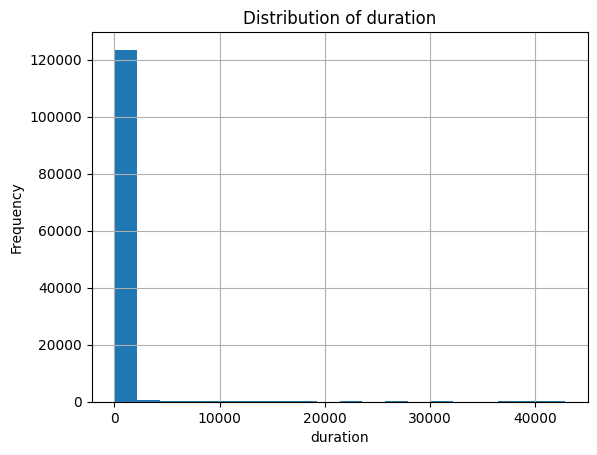

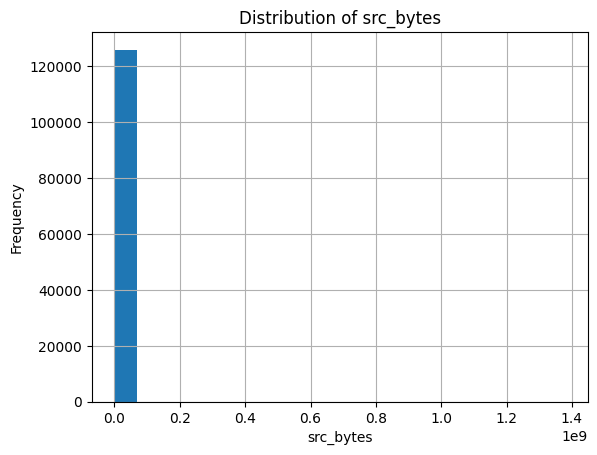

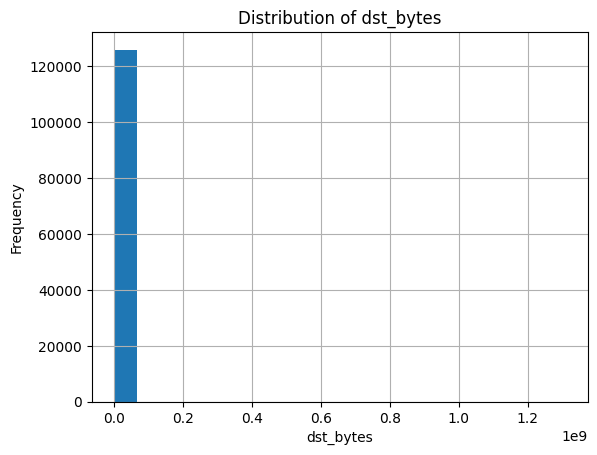

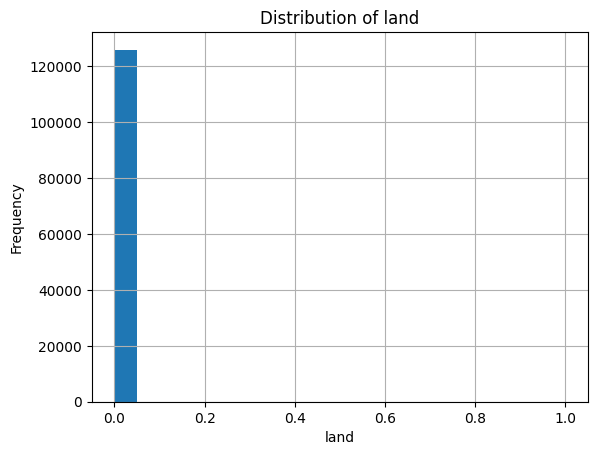

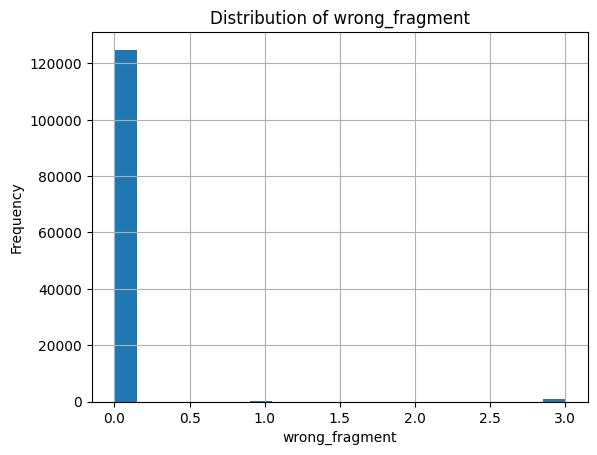

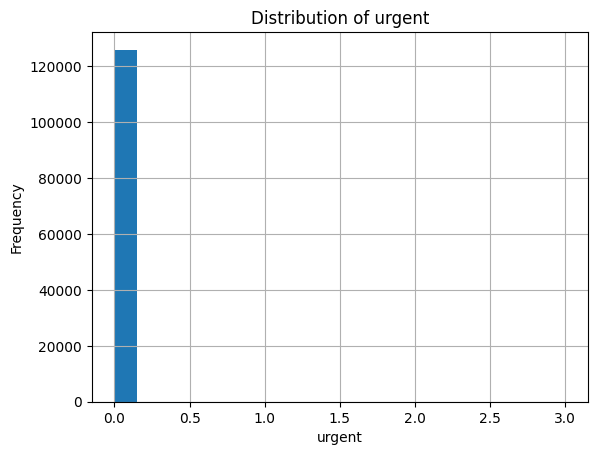

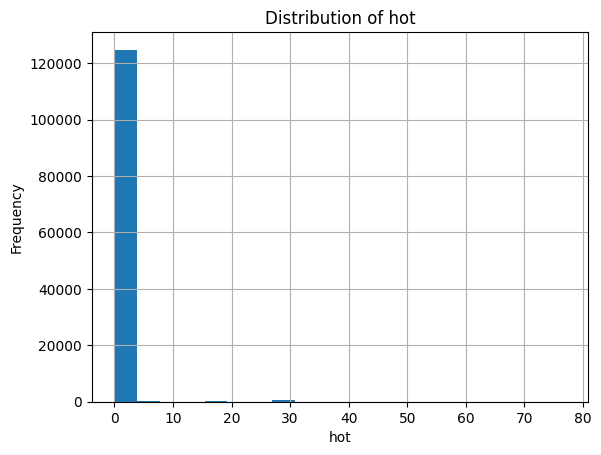

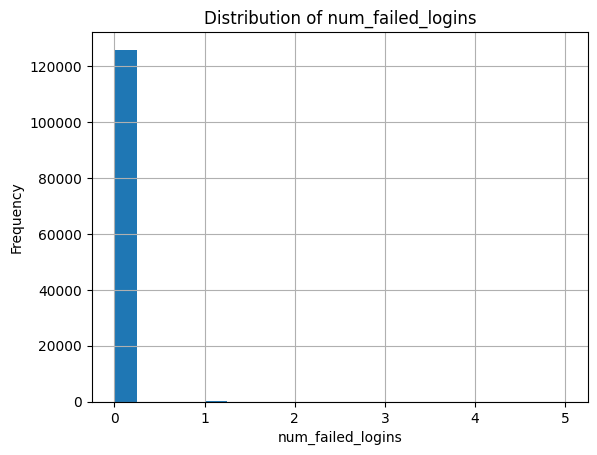

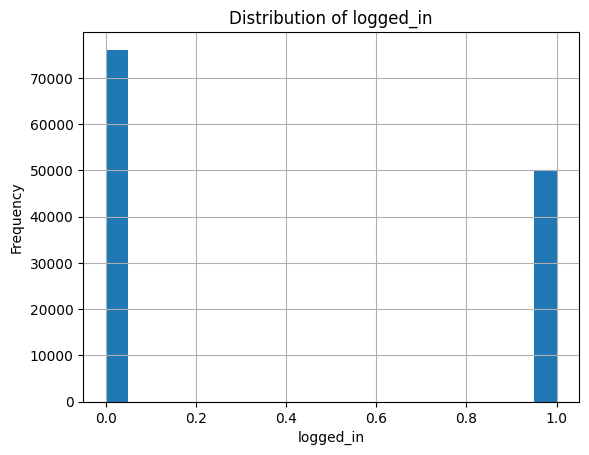

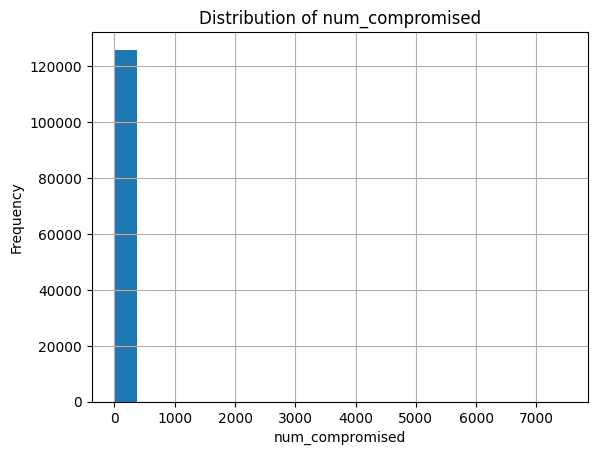

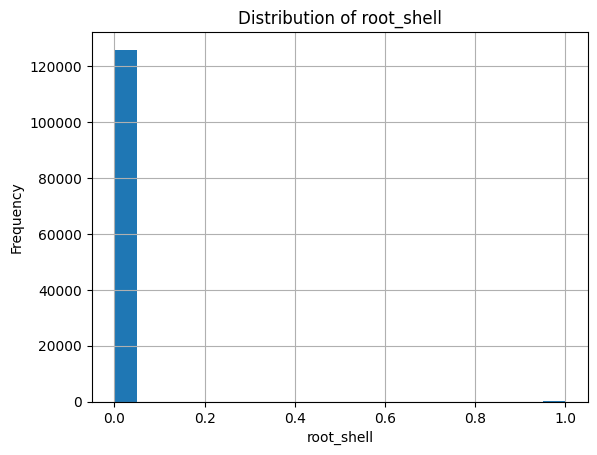

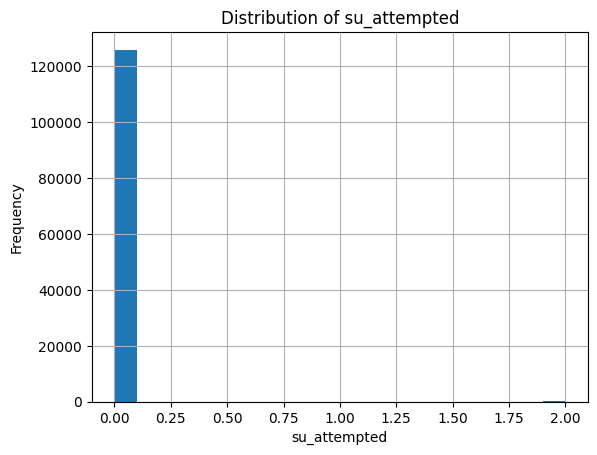

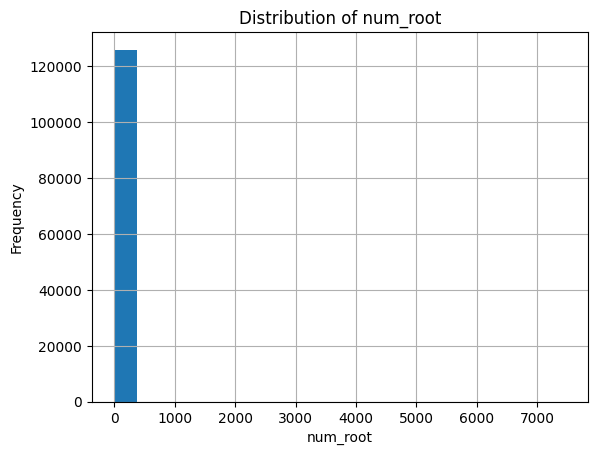

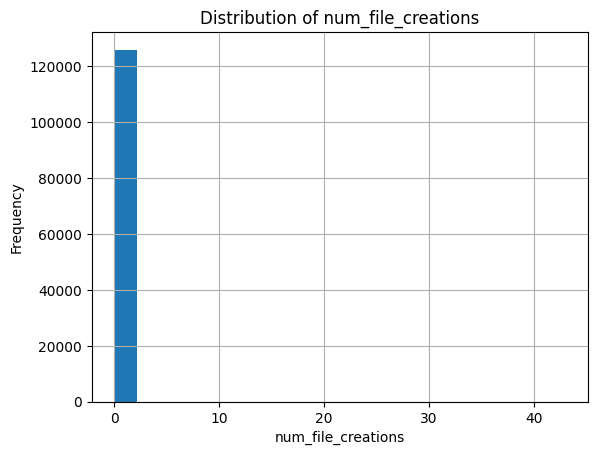

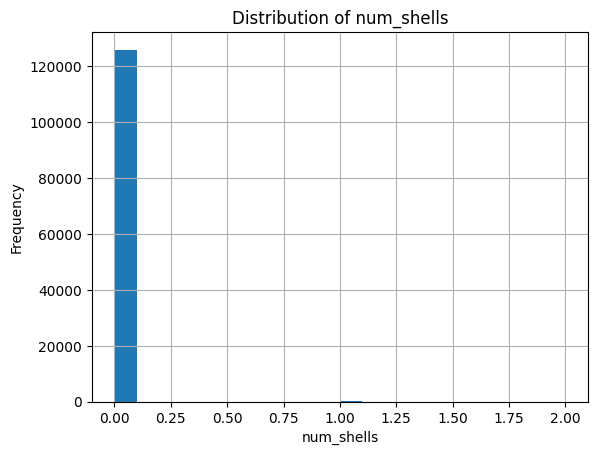

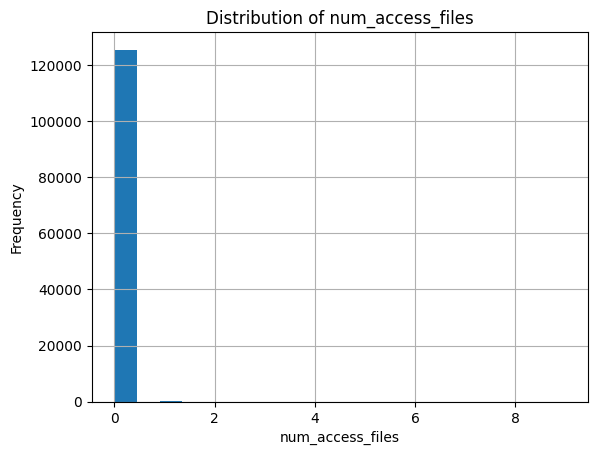

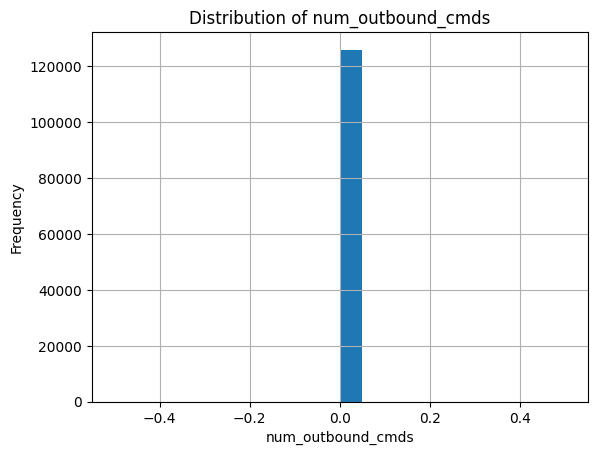

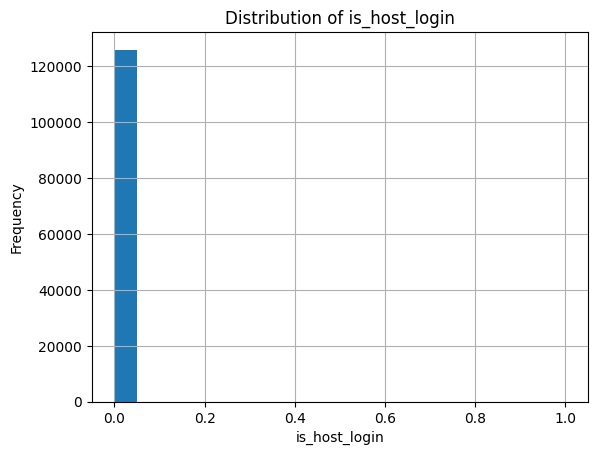

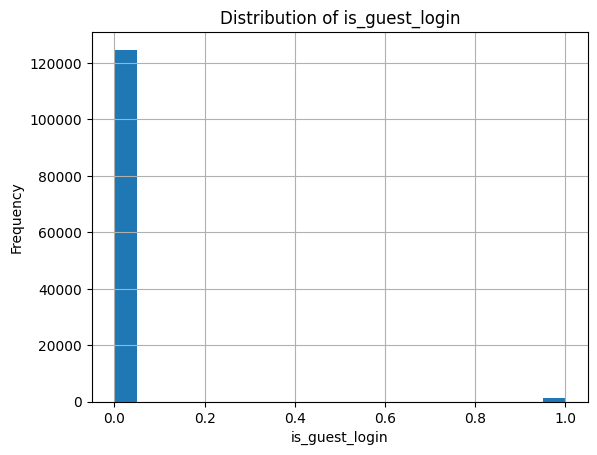

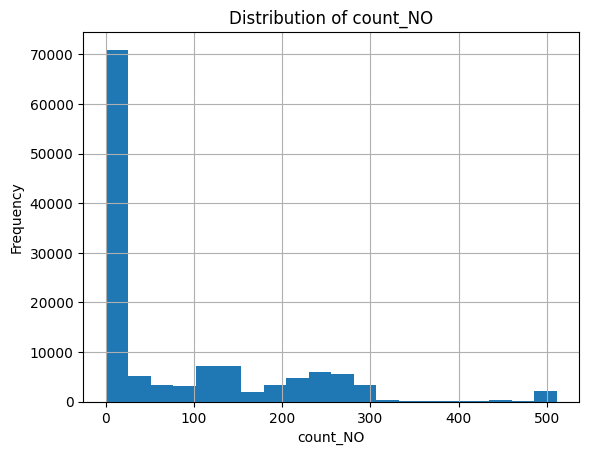

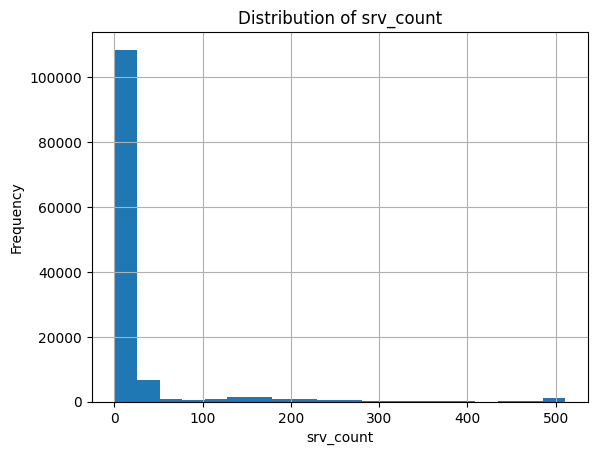

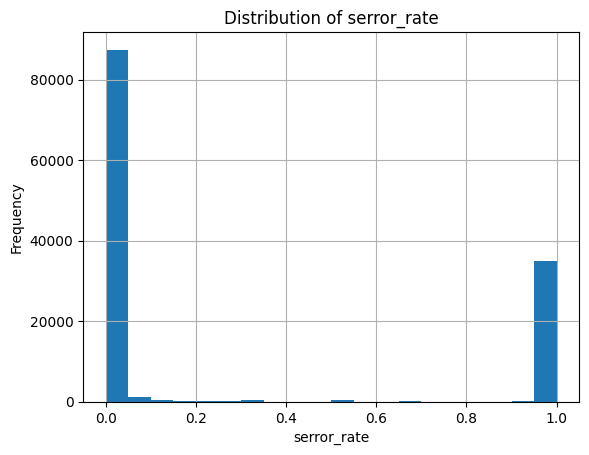

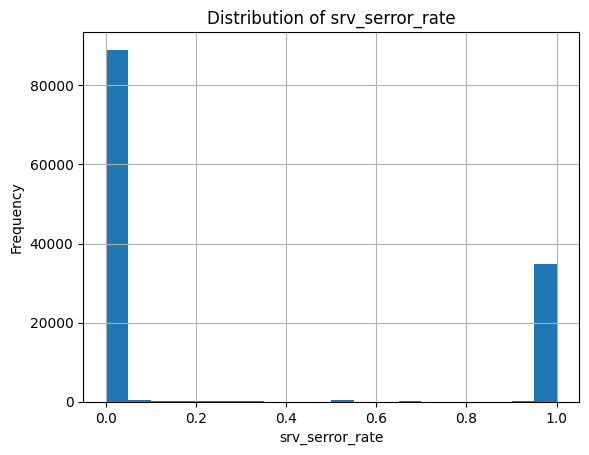

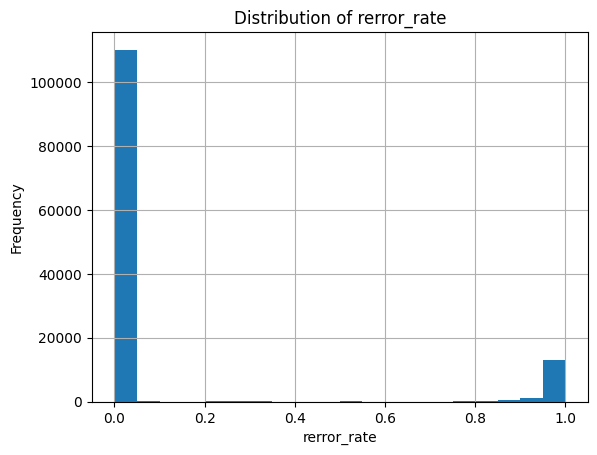

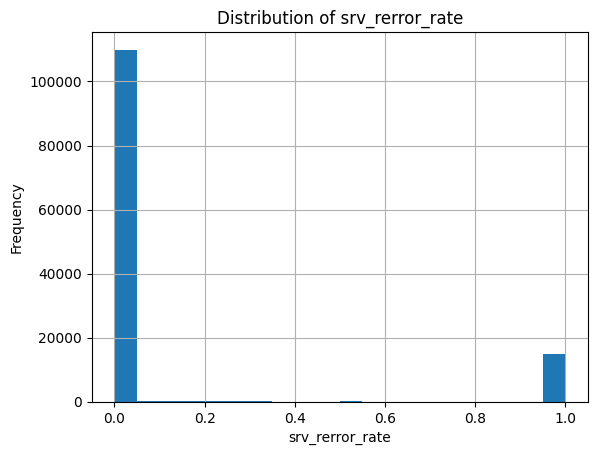

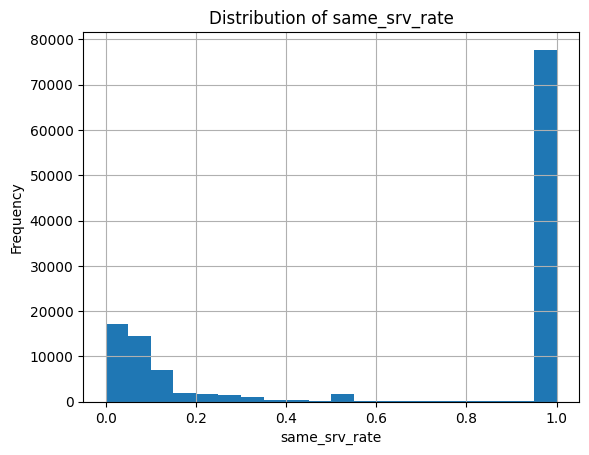

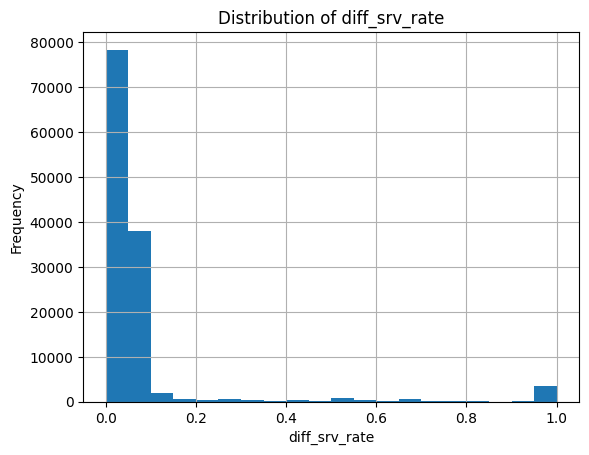

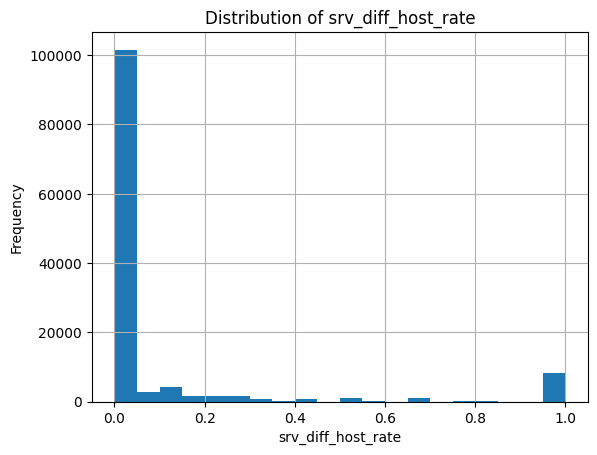

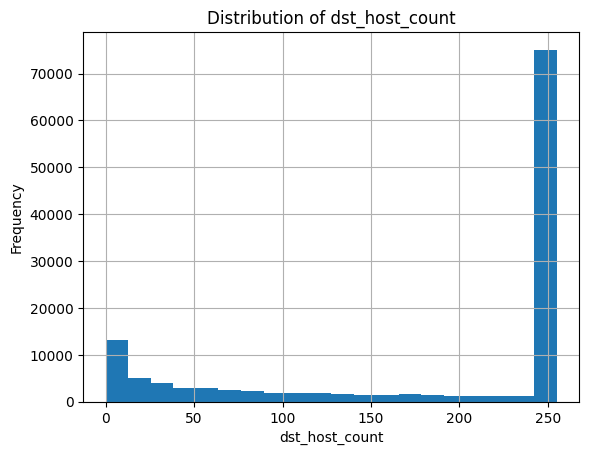

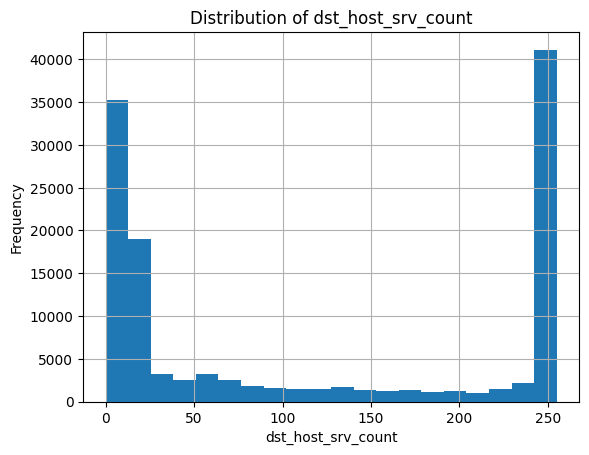

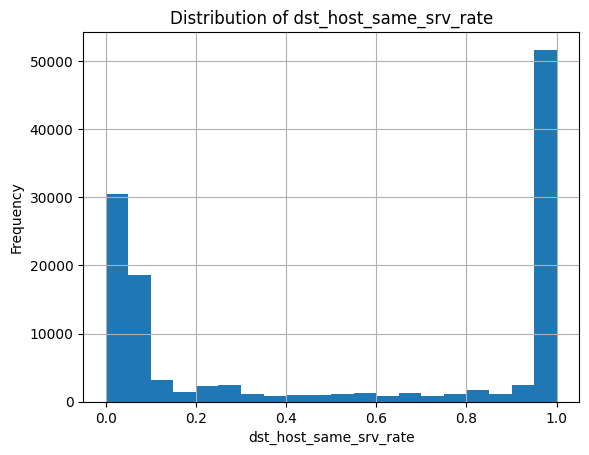

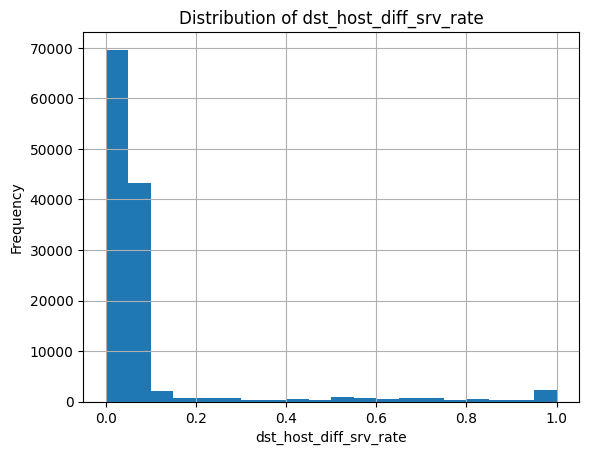

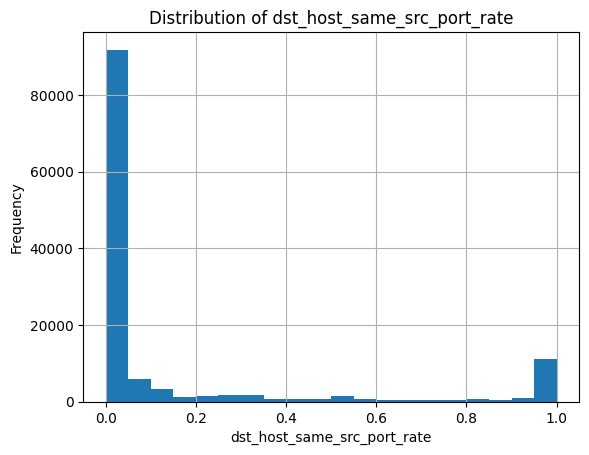

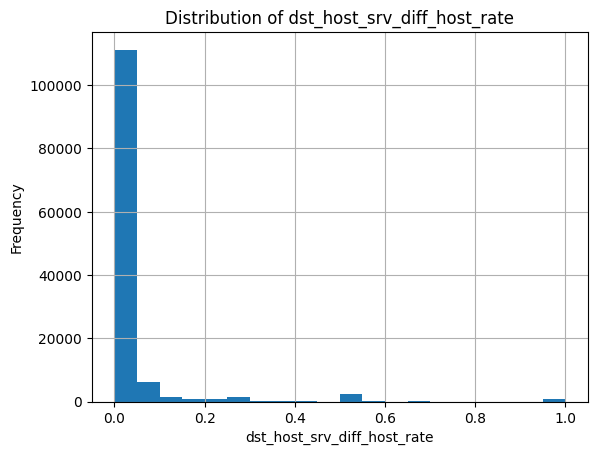

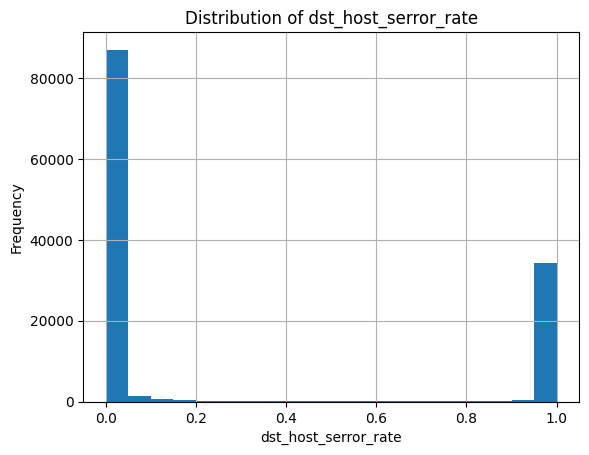

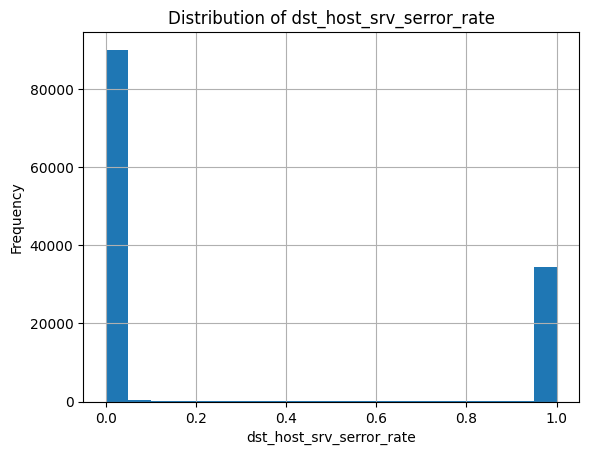

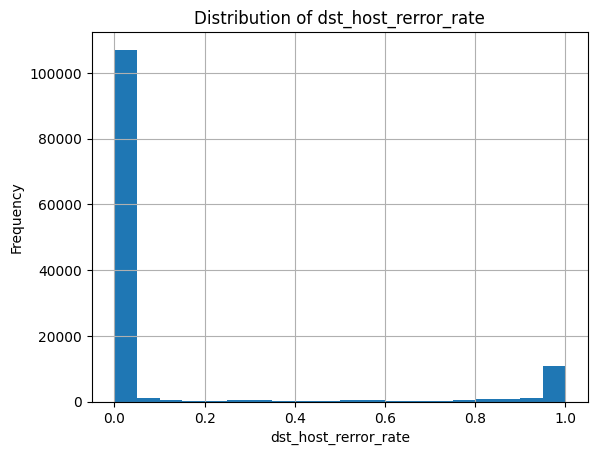

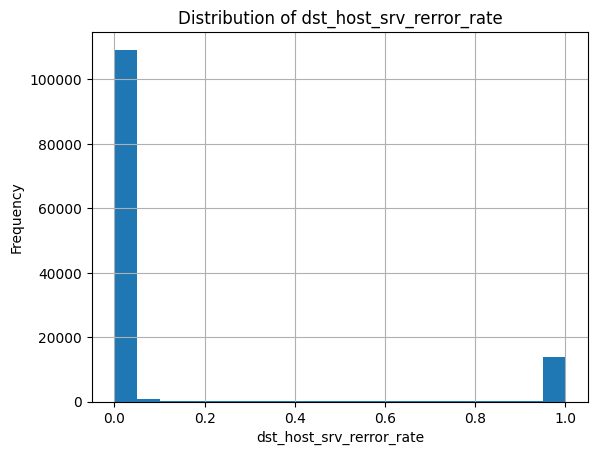

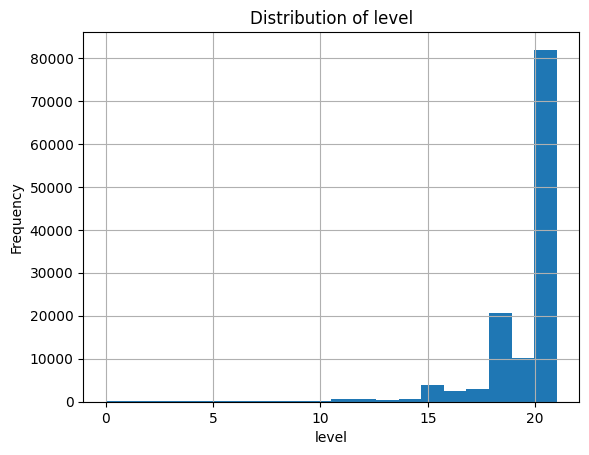

In [96]:
for column in numerical_columns:
    data_train[column].hist(bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

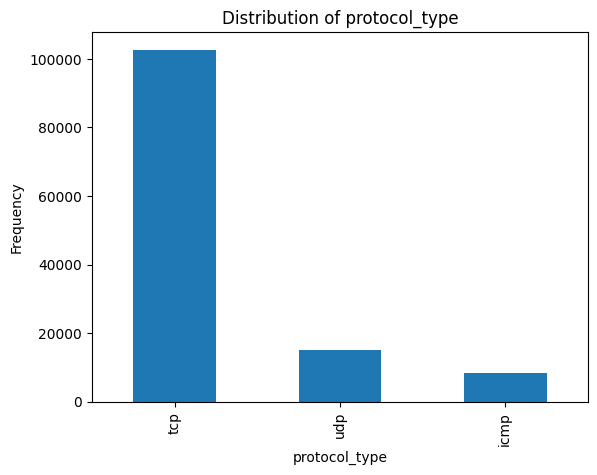

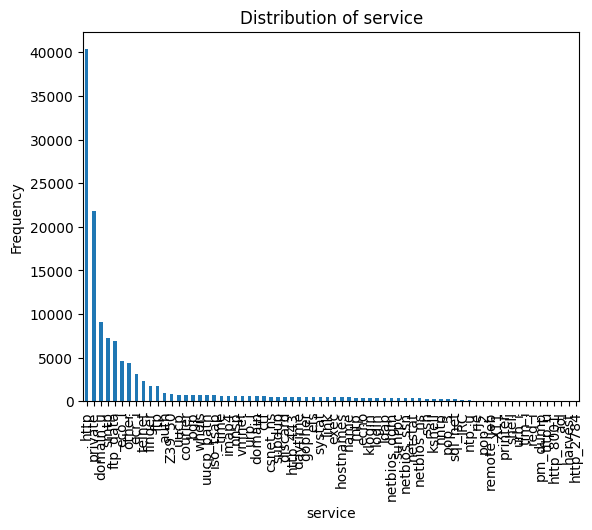

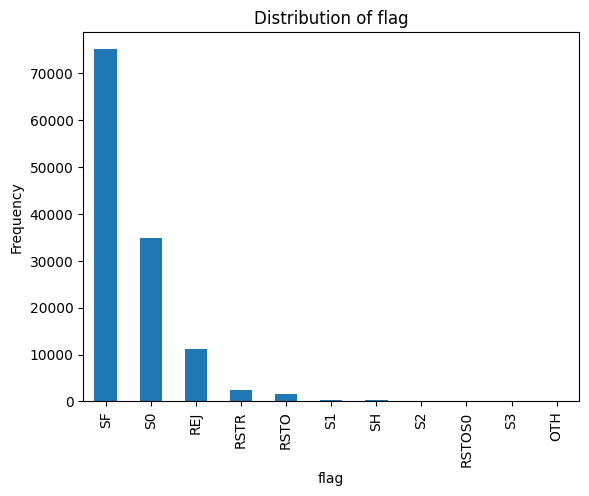

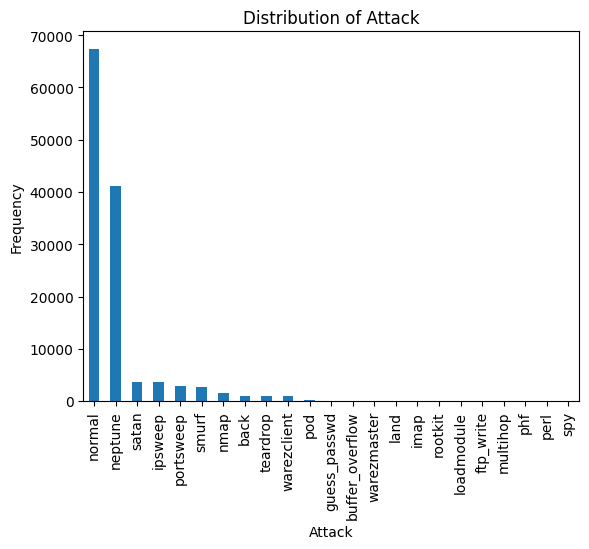

In [97]:
for column in categorical_columns:
    data_train[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

**1-Filtering Data:**
- Keeping only records with the 'protocol_type' as 'tcp'.
- Removing content-related features.

In [7]:
# Filter by protocol_type
data_train_filtered = data_train[data_train['protocol_type'] == 'tcp']
data_test_filtered = data_test[data_test['protocol_type'] == 'tcp']

# Remove content-related features
content_related_features = ['service', 'flag']
data_train_filtered = data_train_filtered.drop(columns=content_related_features)
data_test_filtered = data_test_filtered.drop(columns=content_related_features)

In [8]:
data_train_filtered

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack,level
0,0,tcp,491,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
2,0,tcp,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,232,8153,0,0,0,0,0,1,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,199,420,0,0,0,0,0,1,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,359,375,0,0,0,0,0,1,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18
125968,0,tcp,0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125970,0,tcp,2231,384,0,0,0,0,0,1,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [9]:
data_train_filtered = pd.get_dummies(data_train_filtered, columns=['protocol_type'])
data_test_filtered = pd.get_dummies(data_test_filtered, columns=['protocol_type'])

In [10]:
data_train_filtered

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack,level,protocol_type_tcp
0,0,491,0,0,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,True
2,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,True
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,True
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,True
5,0,0,0,0,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,359,375,0,0,0,0,0,1,0,...,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18,True
125968,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,True
125970,0,2231,384,0,0,0,0,0,1,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,True
125971,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,True


**Removing duplicates if exists**

In [11]:
data_train_filtered.drop_duplicates(subset=None,keep='first',inplace=False,ignore_index=False)
data_train_filtered

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack,level,protocol_type_tcp
0,0,491,0,0,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,True
2,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,True
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,True
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,True
5,0,0,0,0,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,359,375,0,0,0,0,0,1,0,...,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18,True
125968,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,True
125970,0,2231,384,0,0,0,0,0,1,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,True
125971,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,True


In [12]:
data_test_filtered.drop_duplicates(subset=None,keep='first',inplace=False,ignore_index=False)
data_test_filtered

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack,level,protocol_type_tcp
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,True
1,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,True
2,2,12983,0,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,True
4,1,0,15,0,0,0,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,True
5,0,267,14515,0,0,0,0,0,1,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,2599,293,0,0,0,0,0,1,0,...,0.13,0.00,0.00,0.00,0.0,0.26,0.00,mailbomb,11,True
22539,0,794,333,0,0,0,0,0,1,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,True
22540,0,317,938,0,0,0,0,0,1,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,True
22541,0,54540,8314,0,0,0,2,0,1,1,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15,True


### Removing the content related features which the router should not be able to reach:

In [13]:
# Separating features and labels
X_train = data_train_filtered.drop(columns=['Attack'])
y_train = data_train_filtered['Attack']

X_test = data_test_filtered.drop(columns=['Attack'])
y_test = data_test_filtered['Attack']

# Finding correlations
correlation_matrix = X_train.corr()

# Finding and removing highly correlated features
def remove_highly_correlated_features(df, threshold=0.57):
    correlated_features = set()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

highly_correlated_features = remove_highly_correlated_features(X_train, threshold=0.57)

# Droping highly correlated features
X_train_filtered = X_train.drop(columns=highly_correlated_features)
X_test_filtered = X_test.drop(columns=highly_correlated_features)

In [14]:
X_train_filtered

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,is_host_login,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,level,protocol_type_tcp
0,0,491,0,0,0,0,0,0,0,0,...,0,2,0.0,0.00,0.00,0.03,0.17,0.00,20,True
2,0,0,0,0,0,0,0,0,0,0,...,0,6,0.0,0.07,0.00,0.05,0.00,0.00,19,True
3,0,232,8153,0,0,0,0,0,1,0,...,0,5,0.0,0.00,0.00,0.00,0.03,0.04,21,True
4,0,199,420,0,0,0,0,0,1,0,...,0,32,0.0,0.00,0.09,0.00,0.00,0.00,21,True
5,0,0,0,0,0,0,0,0,0,0,...,0,19,1.0,0.06,0.00,0.07,0.00,0.00,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,359,375,0,0,0,0,0,1,0,...,0,11,0.0,0.00,0.18,0.00,0.33,0.04,18,True
125968,0,0,0,0,0,0,0,0,0,0,...,0,25,0.0,0.06,0.00,0.06,0.00,0.00,20,True
125970,0,2231,384,0,0,0,0,0,1,0,...,0,1,0.0,0.00,0.00,0.06,0.00,0.00,18,True
125971,0,0,0,0,0,0,0,0,0,0,...,0,8,0.0,0.05,0.00,0.05,0.00,0.00,20,True


In [15]:
X_test_filtered

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,is_host_login,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,level,protocol_type_tcp
0,0,0,0,0,0,0,0,0,0,0,...,0,10,1.0,0.06,0.00,0.06,0.00,0.00,21,True
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1.0,0.06,0.00,0.06,0.00,0.00,21,True
2,2,12983,0,0,0,0,0,0,0,0,...,0,1,0.0,0.00,0.00,0.04,0.61,0.02,21,True
4,1,0,15,0,0,0,0,0,0,0,...,0,8,1.0,0.00,0.75,0.17,0.03,0.02,11,True
5,0,267,14515,0,0,0,0,0,1,0,...,0,4,0.0,0.00,0.00,0.00,0.01,0.03,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,1,2599,293,0,0,0,0,0,1,0,...,0,2,0.0,0.00,0.00,0.13,0.00,0.00,11,True
22539,0,794,333,0,0,0,0,0,1,0,...,0,1,0.0,0.00,0.00,0.06,0.01,0.01,21,True
22540,0,317,938,0,0,0,0,0,1,0,...,0,11,0.0,0.00,0.18,0.00,0.01,0.01,21,True
22541,0,54540,8314,0,0,0,2,0,1,1,...,0,10,0.0,0.00,0.20,0.00,0.00,0.00,15,True


In [16]:
unique_value_counts = data_train.nunique()
unique_value_counts

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count_NO                        512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

**The variable num_outbound_cmds takes one value so we can drop it**

In [17]:
X_train_filtered = X_train_filtered.drop(columns=["num_outbound_cmds"])
X_test_filtered = X_test_filtered.drop(columns=["num_outbound_cmds"])
print(f"The shape of X_train_filtered : {X_train_filtered.shape}")
print(f"The shape of X_test_filtered : {X_test_filtered.shape}")

The shape of X_train_filtered : (102689, 24)
The shape of X_test_filtered : (18880, 24)


In [18]:
# Combining X and y for the training set
d_raw_train = pd.concat([X_train_filtered, y_train], axis=1)

# Combining X and y for the test set
d_raw_test = pd.concat([X_test_filtered, y_test], axis=1)

In [19]:
d_raw_train.loc[d_raw_train.Attack=="normal"].count()

duration                       53600
src_bytes                      53600
dst_bytes                      53600
land                           53600
wrong_fragment                 53600
urgent                         53600
hot                            53600
num_failed_logins              53600
logged_in                      53600
num_compromised                53600
root_shell                     53600
num_file_creations             53600
num_shells                     53600
num_access_files               53600
is_host_login                  53600
srv_count                      53600
rerror_rate                    53600
diff_srv_rate                  53600
srv_diff_host_rate             53600
dst_host_diff_srv_rate         53600
dst_host_same_src_port_rate    53600
dst_host_srv_diff_host_rate    53600
level                          53600
protocol_type_tcp              53600
Attack                         53600
dtype: int64

In [20]:
d_raw_test.loc[d_raw_test.Attack=="normal"].count()

duration                       7842
src_bytes                      7842
dst_bytes                      7842
land                           7842
wrong_fragment                 7842
urgent                         7842
hot                            7842
num_failed_logins              7842
logged_in                      7842
num_compromised                7842
root_shell                     7842
num_file_creations             7842
num_shells                     7842
num_access_files               7842
is_host_login                  7842
srv_count                      7842
rerror_rate                    7842
diff_srv_rate                  7842
srv_diff_host_rate             7842
dst_host_diff_srv_rate         7842
dst_host_same_src_port_rate    7842
dst_host_srv_diff_host_rate    7842
level                          7842
protocol_type_tcp              7842
Attack                         7842
dtype: int64

In [21]:
def assignClass(atkType: str) -> int:

    Dos = ["neptune", "back", "land", "pod", "smurf", "teardrop", "mailbomb", "apache2", "processtable", "udpstorm", "worm"]
    U2R = ["buffer_overflow", "loadmodule", "perl", "rootkit", "ps", "sqlattack", "xterm"]
    R2L = ["ftp_write", "guess_passwd", "imap", "multihop", "phf", "spy", "warezclient", "warezmaster",
    "sendmail", "named", "snmpgetattack", "snmpguess", "xlock", "xsnoop", "httptunnel"]
    Probe = ["ipsweep", "nmap", "portsweep", "satan", "mscan", "saint"]


    attack_type = 0  # normal

    if atkType in Dos:
        attack_type = 1
    elif atkType in U2R:
        attack_type = 2
    elif atkType in R2L:
        attack_type = 3
    elif atkType in Probe:
        attack_type = 4

    return attack_type

In [22]:
def addGroup(data):
    data['xAttack_g'] = data['Attack'].apply(assignClass)

In [23]:
addGroup(d_raw_train)
addGroup(d_raw_test)
d_raw_train.drop('Attack', axis=1, inplace=True)
d_raw_test.drop('Attack', axis=1, inplace=True)

In [24]:
d_raw_train['xAttack_g'].unique()

array([0, 1, 3, 4, 2])

In [25]:
d_raw_test['xAttack_g'].unique()

array([1, 0, 4, 3, 2])

[]

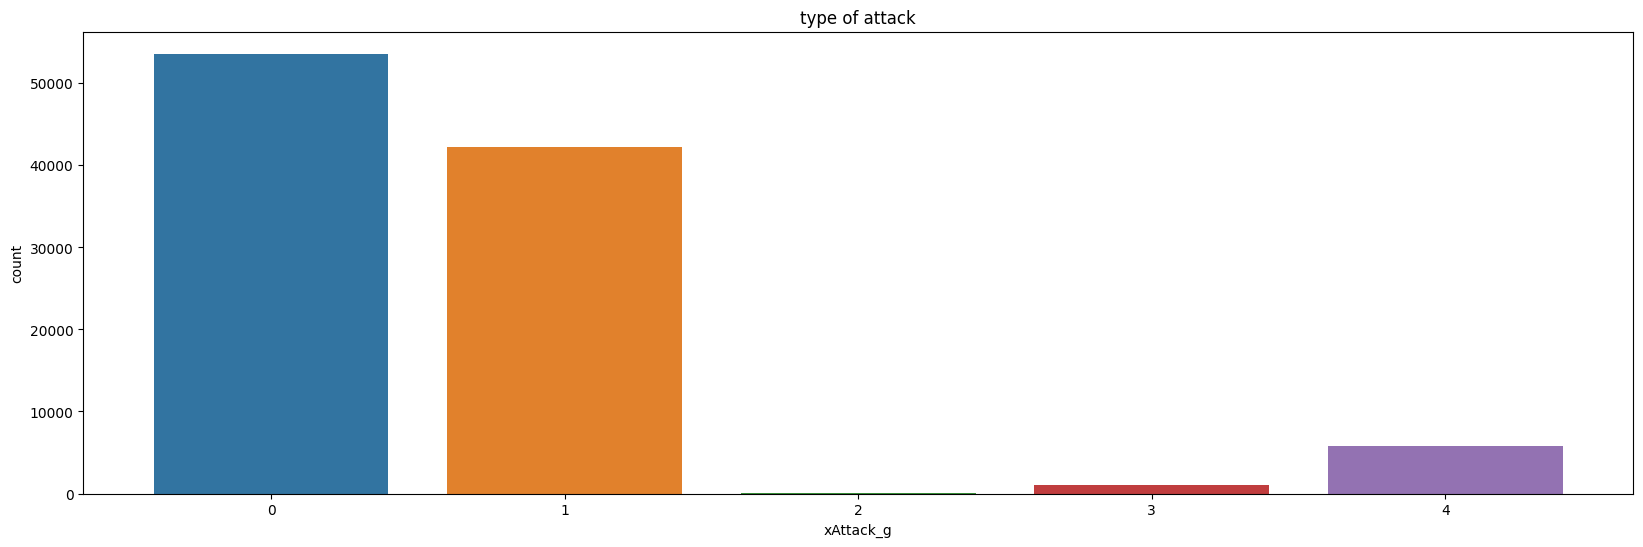

In [26]:
plt.figure(figsize=(20,6))
plt.title("type of attack")
sns.countplot(data = d_raw_train, x = "xAttack_g")
plt.plot()

In [27]:
d_raw_train['xAttack_g'] = d_raw_train['xAttack_g'].apply(lambda x: 0 if x == 0 else 1)
d_raw_test['xAttack_g'] = d_raw_test['xAttack_g'].apply(lambda x: 0 if x == 0 else 1)

In [28]:
d_raw_train['xAttack_g'].unique()

array([0, 1])

In [29]:
d_raw_test['xAttack_g'].unique()

array([1, 0])

#### Now that we have preprocessed our data as requested, we can proceed to generate eight types of data and evaluate each of the six models on them to facilitate the comparison.

# 1- d_raw

## 1-1- KM-C:

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score,precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

def evaluate_anomaly_detection_km_c(data_train, data_test, label_column='xAttack_g', threshold=0.8, num_clusters=5):

    normal_train_data = data_train[data_train[label_column] == 0]

    features = list(data_train.columns)
    features.remove(label_column)

    X_normal_train = normal_train_data[features].values

    kmeans = KMeans(n_clusters=num_clusters, random_state=0)

    kmeans.fit(X_normal_train)

    distances_normal_train = kmeans.transform(X_normal_train)

    X_test = data_test[features].values
    distances_test = kmeans.transform(X_test)

    anomalies = (distances_test.min(axis=1) > threshold)

    true_labels_test = data_test[label_column] == 1

    f1 = f1_score(true_labels_test, anomalies)
    sensitivity = recall_score(true_labels_test, anomalies)
    precision = precision_score(true_labels_test, anomalies)
    """
    cnf_matrix = confusion_matrix(true_labels_test, anomalies)
    TN, FP = cnf_matrix[0, 0], cnf_matrix[0, 1]
    FN, TP = cnf_matrix[1, 0], cnf_matrix[1, 1]

    # Calculating PPV and NPV
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)

    # Calculating CAP
    CAP = (PPV + NPV - 1) / (PPV + NPV - 0.5)
    """
    # Printing result
    print("F1-score:", f1)
    print("Sensitivity (Recall):", sensitivity)
    print("Accuracy:", accuracy_score(true_labels_test, anomalies))
    print("Classification Report:")
    print(classification_report(true_labels_test, anomalies))


In [32]:
evaluate_anomaly_detection_km_c(d_raw_train, d_raw_test, label_column='xAttack_g', threshold=0.8, num_clusters=2)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7378835483655325
Sensitivity (Recall): 1.0
Accuracy: 0.5846398305084746
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      7842
        True       0.58      1.00      0.74     11038

    accuracy                           0.58     18880
   macro avg       0.29      0.50      0.37     18880
weighted avg       0.34      0.58      0.43     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1-2- KM-D: 

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

def evaluate_anomaly_detection_km_d(data_train, data_test, label_column='xAttack_g', threshold=0.8, num_clusters=5):
    normal_train_data = data_train[data_train[label_column] == 0]

    features = list(data_train.columns)
    features.remove(label_column)

    X_normal_train = normal_train_data[features].values

    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_normal_train)

    # Compute squared Euclidean distances for training data
    distances_normal_train = kmeans.transform(X_normal_train) ** 2

    X_test = data_test[features].values

    # Compute squared Euclidean distances for testing data
    distances_test = kmeans.transform(X_test) ** 2

    # Identify anomalies based on squared Euclidean distances and threshold
    anomalies = (distances_test.min(axis=1) > threshold)

    true_labels_test = data_test[label_column] == 1

    # Evaluate performance metrics
    f1 = f1_score(true_labels_test, anomalies)
    sensitivity = recall_score(true_labels_test, anomalies)
    precision = precision_score(true_labels_test, anomalies)

    # Print the evaluation results
    print("F1-score:", f1)
    print("Sensitivity (Recall):", sensitivity)
    print("Accuracy:", accuracy_score(true_labels_test, anomalies))
    print("Classification Report:")
    print(classification_report(true_labels_test, anomalies))


In [34]:
evaluate_anomaly_detection_km_d(d_raw_train, d_raw_test, label_column='xAttack_g', threshold=0.8, num_clusters=2)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7378835483655325
Sensitivity (Recall): 1.0
Accuracy: 0.5846398305084746
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      7842
        True       0.58      1.00      0.74     11038

    accuracy                           0.58     18880
   macro avg       0.29      0.50      0.37     18880
weighted avg       0.34      0.58      0.43     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1-3- SVM:

In [35]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

def evaluate_anomaly_detection_svm(data_train, data_test, label_column='xAttack_g', nu=0.05, kernel='rbf'):
    normal_train_data = data_train[data_train[label_column] == 0]

    features = list(data_train.columns)
    features.remove(label_column)

    X_normal_train = normal_train_data[features].values

    # Train one-class SVM on normal instances
    clf = OneClassSVM(nu=nu, kernel=kernel)
    clf.fit(X_normal_train)

    # Predict on testing data
    predictions = clf.predict(data_test[features].values)
    
    # Anomalies are labeled as -1, normal instances as 1
    anomalies = (predictions == -1)

    true_labels_test = data_test[label_column] == 1

    # Evaluate performance metrics
    f1 = f1_score(true_labels_test, anomalies)
    sensitivity = recall_score(true_labels_test, anomalies)
    precision = precision_score(true_labels_test, anomalies)

    # Print the evaluation results
    print("F1-score:", f1)
    print("Sensitivity (Recall):", sensitivity)
    print("Accuracy:", accuracy_score(true_labels_test, anomalies))
    print("Classification Report:")
    print(classification_report(true_labels_test, anomalies))


In [36]:
evaluate_anomaly_detection_svm(d_raw_train, d_raw_test, label_column='xAttack_g',nu=0.05, kernel='rbf')

F1-score: 0.8239974871741179
Sensitivity (Recall): 0.7129914839644863
Accuracy: 0.8219279661016949
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.98      0.82      7842
        True       0.98      0.71      0.82     11038

    accuracy                           0.82     18880
   macro avg       0.84      0.84      0.82     18880
weighted avg       0.86      0.82      0.82     18880



## 1-4- Decision Tree:

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score

def evaluate_anomaly_detection_dt(data_train, data_test, label_column='xAttack_g', fill_value=1):
    # Extract features (excluding the label column)
    features = data_train.columns.drop(label_column)
    
    # Fill missing values in the label column
    data_train[label_column] = data_train[label_column].fillna(fill_value)
    data_test[label_column] = data_test[label_column].fillna(fill_value)
    
    # Extract label column
    y_train = data_train[label_column]
    y_test = data_test[label_column]
    
    # Train a default Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(data_train[features], y_train)
    
    # Predict on testing data
    predictions_test = clf.predict(data_test[features])
    
    # Evaluate F1-score and sensitivity on the testing data
    f1_test = f1_score(y_test, predictions_test)
    sensitivity_test = recall_score(y_test, predictions_test)

    print("\nTesting Data:")
    print("F1-score:", f1_test)
    print("Sensitivity:", sensitivity_test)



In [38]:
evaluate_anomaly_detection_dt(d_raw_train, d_raw_test, label_column='xAttack_g')


Testing Data:
F1-score: 0.7902804957599477
Sensitivity: 0.6585432143504258


## 1-5-MLP:

In [39]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

def evaluate_anomaly_detection_mlp(data_train, data_test, label_column='xAttack_g'):
    features = list(data_train.columns)
    features.remove(label_column)

    X_train = data_train[features].values
    y_train = data_train[label_column].values

    # Creating an MLP classifier with one hidden layer of 100 neurons
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=0)
    
    # Train the MLP classifier
    clf.fit(X_train, y_train)

    # Predict on testing data
    predictions = clf.predict(data_test[features].values)

    # Anomalies are labeled as 1, normal instances as 0
    anomalies = (predictions == 1)

    true_labels_test = data_test[label_column] == 1

    # Evaluate performance metrics
    f1 = f1_score(true_labels_test, anomalies)
    sensitivity = recall_score(true_labels_test, anomalies)
    precision = precision_score(true_labels_test, anomalies)

    # Print the evaluation results
    print("F1-score:", f1)
    print("Sensitivity (Recall):", sensitivity)
    print("Accuracy:", accuracy_score(true_labels_test, anomalies))
    print("Classification Report:")
    print(classification_report(true_labels_test, anomalies))


In [40]:
evaluate_anomaly_detection_mlp(d_raw_train, d_raw_test, label_column='xAttack_g')

F1-score: 0.7452500969367972
Sensitivity (Recall): 0.6094401159630368
Accuracy: 0.7564088983050847
Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.96      0.77      7842
        True       0.96      0.61      0.75     11038

    accuracy                           0.76     18880
   macro avg       0.80      0.79      0.76     18880
weighted avg       0.83      0.76      0.75     18880



## 1-6- Voting:

As mentions the table there will be no results for the voting algorithm for the raw data.

# 2-d_raw_probs:

In [41]:
lowest_bic = np.infty
best_n_components = 1
bic = []
n_components_range = range(1, 10)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(d_raw_train.drop(columns=['xAttack_g']))
    bic.append(gmm.bic(d_raw_train.drop(columns=['xAttack_g'])))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_n_components = n_components

print(f"Best number of components based on BIC: {best_n_components}")

Best number of components based on BIC: 9


In [42]:
import pandas as pd
from sklearn.mixture import GaussianMixture

def fit_gmm_and_transform(data_train, data_test, label_column='xAttack_g', num_components=9):
    # Extract normal instances for training the GMM
    normal_train_data = data_train[data_train[label_column] == 0]

    features = list(data_train.columns)
    features.remove(label_column)

    X_normal_train = normal_train_data[features].values

    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=num_components, random_state=0)
    gmm.fit(X_normal_train)

    # Compute the log-likelihood of each sample in the training data
    log_likelihood_train = gmm.score_samples(data_train[features].values)

    # Compute the log-likelihood of each sample in the testing data
    log_likelihood_test = gmm.score_samples(data_test[features].values)

    # Transform training data using log-likelihood values
    d_raw_probs_train = data_train.copy()
    d_raw_probs_train['gmm_log_likelihood'] = log_likelihood_train

    # Transform testing data using log-likelihood values
    d_raw_probs_test = data_test.copy()
    d_raw_probs_test['gmm_log_likelihood'] = log_likelihood_test

    return d_raw_probs_train, d_raw_probs_test

num_components = 9

# Apply GMM and transform the datasets
d_raw_probs_train, d_raw_probs_test = fit_gmm_and_transform(d_raw_train, d_raw_test, num_components=num_components)


## 2-1-KM_C:

In [43]:
evaluate_anomaly_detection_km_c(d_raw_probs_train, d_raw_probs_test, label_column='xAttack_g', threshold=0.8, num_clusters=2)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7378835483655325
Sensitivity (Recall): 1.0
Accuracy: 0.5846398305084746
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      7842
        True       0.58      1.00      0.74     11038

    accuracy                           0.58     18880
   macro avg       0.29      0.50      0.37     18880
weighted avg       0.34      0.58      0.43     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2-2- KM_D:

In [44]:
evaluate_anomaly_detection_km_d(d_raw_probs_train, d_raw_probs_test, label_column='xAttack_g', threshold=0.8, num_clusters=2)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7378835483655325
Sensitivity (Recall): 1.0
Accuracy: 0.5846398305084746
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      7842
        True       0.58      1.00      0.74     11038

    accuracy                           0.58     18880
   macro avg       0.29      0.50      0.37     18880
weighted avg       0.34      0.58      0.43     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2-3- SVM:

In [45]:
evaluate_anomaly_detection_svm(d_raw_probs_train, d_raw_probs_test, label_column='xAttack_g')

F1-score: 0.8241821512693012
Sensitivity (Recall): 0.7132632723319442
Accuracy: 0.8220868644067797
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.98      0.82      7842
        True       0.98      0.71      0.82     11038

    accuracy                           0.82     18880
   macro avg       0.84      0.84      0.82     18880
weighted avg       0.86      0.82      0.82     18880



## 2-4- DT:

In [46]:
evaluate_anomaly_detection_dt(d_raw_probs_train, d_raw_probs_test, label_column='xAttack_g')


Testing Data:
F1-score: 0.7937452656638893
Sensitivity: 0.664522558434499


## 2-5- MLP:

In [47]:
evaluate_anomaly_detection_mlp(d_raw_probs_train, d_raw_probs_test, label_column='xAttack_g')

F1-score: 0.822015043966522
Sensitivity (Recall): 0.7029353143685451
Accuracy: 0.8220338983050848
Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.99      0.82      7842
        True       0.99      0.70      0.82     11038

    accuracy                           0.82     18880
   macro avg       0.85      0.85      0.82     18880
weighted avg       0.87      0.82      0.82     18880



## 2-6- Voting:

In [51]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score, recall_score

def get_feature_probability(gmm, feature_data):
    """Get the occurrence probability of a certain value of a feature in a given traffic vector."""
    return np.exp(gmm.score_samples(feature_data.reshape(-1, 1)))[0]

def vote(probabilities, threshold, consensus):
    """Implement the voting scheme."""
    positive_votes = np.sum(probabilities > threshold)
    if positive_votes >= consensus:
        return 1  # Anomalous
    else:
        return 0  # Normal

# Step 1: Fit a Gaussian Mixture Model to the training data
gmm = GaussianMixture(n_components=9, random_state=0)
gmm.fit(d_raw_train['xAttack_g'].values.reshape(-1, 1))

# Step 2: Use the GMM to calculate the probability of a certain value of a feature in a given traffic vector
probabilities_train = [get_feature_probability(gmm, x) for x in d_raw_train['xAttack_g'].values]
probabilities_test = [get_feature_probability(gmm, x) for x in d_raw_test['xAttack_g'].values]

# Step 3: Establish the individual feature probability threshold
alpha = 0.05
consensus = 0.55

# Step 4: Implement the voting scheme on the training data
predictions_train = np.array([vote(p, alpha, consensus) for p in probabilities_train])

# Step 5: Implement the voting scheme on the testing data
predictions_test = np.array([vote(p, alpha, consensus) for p in probabilities_test])

# Evaluate F1-score and sensitivity on the testing data
true_labels_test = (d_raw_test['xAttack_g'] == 1).astype(int)
f1_test = f1_score(true_labels_test, predictions_test)
sensitivity_test = recall_score(true_labels_test, predictions_test)

print("\nTesting Data:")
print("F1-score:", f1_test)
print("Sensitivity:", sensitivity_test)


/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Testing Data:
F1-score: 0.7378835483655325
Sensitivity: 1.0


# 3-d_raw_pca:


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Extract features (excluding the label column, if any)
features = d_raw_train.columns.drop('xAttack_g')  
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(d_raw_train[features])
scaled_test_data = scaler.transform(d_raw_test[features])

# Set the desired number of components for PCA
num_components = 23  # You can adjust this based on your preference

# Apply PCA to the training data
pca = PCA(n_components=num_components)
d_raw_pca_train = pca.fit_transform(scaled_train_data)

# Apply PCA to the testing data
d_raw_pca_test = pca.transform(scaled_test_data)

# Create new dataframes with PCA components
columns = [f'PC{i+1}' for i in range(num_components)]
d_raw_pca_train = pd.DataFrame(data=d_raw_pca_train, columns=columns)
d_raw_pca_test = pd.DataFrame(data=d_raw_pca_test, columns=columns)

# Concatenate the label column back to the PCA dataframes if applicable
d_raw_pca_train['xAttack_g'] = d_raw_train['xAttack_g']
d_raw_pca_test['xAttack_g'] = d_raw_test['xAttack_g']

# Now d_raw_pca_train and d_raw_pca_test contain the PCA-transformed data


## 3-1-KM_C:

In [53]:
evaluate_anomaly_detection_km_c(d_raw_pca_train, d_raw_pca_test, label_column='xAttack_g', threshold=0.8, num_clusters=2)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.6564190150868204
Sensitivity (Recall): 1.0
Accuracy: 0.4885593220338983
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      9656
        True       0.49      1.00      0.66      9224

    accuracy                           0.49     18880
   macro avg       0.24      0.50      0.33     18880
weighted avg       0.24      0.49      0.32     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3-2-KM_D:

In [54]:
evaluate_anomaly_detection_km_d(d_raw_pca_train, d_raw_pca_test, label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.6428464977645306
Sensitivity (Recall): 0.9352775368603643
Accuracy: 0.4922669491525424
Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.07      0.12      9656
        True       0.49      0.94      0.64      9224

    accuracy                           0.49     18880
   macro avg       0.51      0.50      0.38     18880
weighted avg       0.51      0.49      0.38     18880



## 3-3-SVM:

In [55]:
evaluate_anomaly_detection_svm(d_raw_pca_train, d_raw_pca_test, label_column='xAttack_g')

F1-score: 0.24000652635013867
Sensitivity (Recall): 0.15947528187337381
Accuracy: 0.5065677966101695
Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.84      0.63      9656
        True       0.48      0.16      0.24      9224

    accuracy                           0.51     18880
   macro avg       0.50      0.50      0.44     18880
weighted avg       0.50      0.51      0.44     18880



## 3-4-DT:

In [56]:
evaluate_anomaly_detection_dt(d_raw_pca_train, d_raw_pca_test, label_column='xAttack_g')


Testing Data:
F1-score: 0.6046916481699091
Sensitivity: 0.5637883460477195


## 3-5 MLP:

In [57]:
evaluate_anomaly_detection_mlp(d_raw_pca_train, d_raw_pca_test, label_column='xAttack_g')

F1-score: 0.7871990718360243
Sensitivity (Recall): 0.9911540334361305
Accuracy: 0.6502648305084746
Classification Report:
              precision    recall  f1-score   support

       False       0.37      0.01      0.02      6558
        True       0.65      0.99      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.51      0.50      0.40     18880
weighted avg       0.55      0.65      0.52     18880



## 3-6 Voting:

In [60]:
gmm.fit(d_raw_pca_train['xAttack_g'].values.reshape(-1, 1))
# Step 2: Use the GMM to calculate the probability of a certain value of a feature in a given traffic vector
probabilities_train = [get_feature_probability(gmm, x) for x in d_raw_pca_train['xAttack_g'].values]
probabilities_test = [get_feature_probability(gmm, x) for x in d_raw_pca_test['xAttack_g'].values]

# Step 3: Establish the individual feature probability threshold
alpha = 0.05
consensus = 0.55

# Step 4: Implement the voting scheme on the training data
predictions_train = np.array([vote(p, alpha, consensus) for p in probabilities_train])

# Step 5: Implement the voting scheme on the testing data
predictions_test = np.array([vote(p, alpha, consensus) for p in probabilities_test])

# Evaluate F1-score and sensitivity on the testing data
true_labels_test = (d_raw_test['xAttack_g'] == 1).astype(int)
f1_test = f1_score(true_labels_test, predictions_test)
sensitivity_test = recall_score(true_labels_test, predictions_test)

print("\nTesting Data:")
print("F1-score:", f1_test)
print("Sensitivity:", sensitivity_test)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Testing Data:
F1-score: 0.7378835483655325
Sensitivity: 1.0


# 4- d_raw_pca_probs:

In [61]:
num_components = 9

# Apply GMM and transform the datasets
d_raw_pca_probs_train, d_raw_pca_probs_test = fit_gmm_and_transform(d_raw_pca_train, d_raw_pca_test, num_components=num_components)

## 4-1- KM_C:

In [62]:
evaluate_anomaly_detection_km_c(d_raw_pca_probs_train, d_raw_pca_probs_test, label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7898211653099161
Sensitivity (Recall): 1.0
Accuracy: 0.6526483050847458
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      6558
        True       0.65      1.00      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.33      0.50      0.39     18880
weighted avg       0.43      0.65      0.52     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4-2- KM_D:

In [63]:
evaluate_anomaly_detection_km_d(d_raw_pca_probs_train, d_raw_pca_probs_test, label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7898211653099161
Sensitivity (Recall): 1.0
Accuracy: 0.6526483050847458
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      6558
        True       0.65      1.00      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.33      0.50      0.39     18880
weighted avg       0.43      0.65      0.52     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4-3- SVM:

In [64]:
evaluate_anomaly_detection_svm(d_raw_pca_probs_train, d_raw_pca_probs_test, label_column='xAttack_g')

F1-score: 0.18636995827538247
Sensitivity (Recall): 0.10874857977601039
Accuracy: 0.3802966101694915
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.89      0.50      6558
        True       0.65      0.11      0.19     12322

    accuracy                           0.38     18880
   macro avg       0.50      0.50      0.34     18880
weighted avg       0.55      0.38      0.30     18880



## 4-4 DT:

In [65]:
evaluate_anomaly_detection_dt(d_raw_pca_probs_train, d_raw_pca_probs_test, label_column='xAttack_g')


Testing Data:
F1-score: 0.6074331667028906
Sensitivity: 0.56703457230969


## 4-5 MLP:

In [66]:
evaluate_anomaly_detection_mlp(d_raw_pca_probs_train, d_raw_pca_probs_test, label_column='xAttack_g')

F1-score: 0.780546676234588
Sensitivity (Recall): 0.9710274306119137
Accuracy: 0.6436440677966102
Classification Report:
              precision    recall  f1-score   support

       False       0.34      0.03      0.05      6558
        True       0.65      0.97      0.78     12322

    accuracy                           0.64     18880
   macro avg       0.50      0.50      0.42     18880
weighted avg       0.55      0.64      0.53     18880



## 4-6- Voting:

In [67]:
gmm.fit(d_raw_pca_probs_train['xAttack_g'].values.reshape(-1, 1))
# Step 2: Use the GMM to calculate the probability of a certain value of a feature in a given traffic vector
probabilities_train = [get_feature_probability(gmm, x) for x in d_raw_pca_probs_train['xAttack_g'].values]
probabilities_test = [get_feature_probability(gmm, x) for x in d_raw_pca_probs_test['xAttack_g'].values]

# Step 3: Establish the individual feature probability threshold
alpha = 0.05
consensus = 0.55

# Step 4: Implement the voting scheme on the training data
predictions_train = np.array([vote(p, alpha, consensus) for p in probabilities_train])

# Step 5: Implement the voting scheme on the testing data
predictions_test = np.array([vote(p, alpha, consensus) for p in probabilities_test])

# Evaluate F1-score and sensitivity on the testing data
true_labels_test = (d_raw_test['xAttack_g'] == 1).astype(int)
f1_test = f1_score(true_labels_test, predictions_test)
sensitivity_test = recall_score(true_labels_test, predictions_test)

print("\nTesting Data:")
print("F1-score:", f1_test)
print("Sensitivity:", sensitivity_test)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Testing Data:
F1-score: 0.7378835483655325
Sensitivity: 1.0


# 5- d_norm:

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Extract features (excluding the label column, if any)
features = d_raw_train.columns.drop('xAttack_g')  
# Separate normal training values
normal_train_values = d_raw_train[d_raw_train['xAttack_g'] == 0][features]

# Create a MinMaxScaler and fit it to the normal training values
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(normal_train_values)

# Transform normal training values to the range [0, 1]
normalized_normal_train_values = min_max_scaler.transform(normal_train_values)

# Apply MinMaxScaler to the entire dataset
min_max_scaled_train_data = min_max_scaler.transform(d_raw_train[features])
min_max_scaled_test_data = min_max_scaler.transform(d_raw_test[features])

# Standardize the rest of the features using the previously fitted StandardScaler
standard_scaled_train_data = scaler.transform(min_max_scaled_train_data)
standard_scaled_test_data = scaler.transform(min_max_scaled_test_data)

# Create new dataframes with normalized values
d_norm_train = pd.DataFrame(data=standard_scaled_train_data, columns=features)
d_norm_test = pd.DataFrame(data=standard_scaled_test_data, columns=features)

# Concatenate the label column back to the normalized dataframes if applicable
d_norm_train['xAttack_g'] = d_raw_train['xAttack_g']
d_norm_test['xAttack_g'] = d_raw_test['xAttack_g']


/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 5-1 KM_C:

In [69]:
evaluate_anomaly_detection_km_c(d_norm_train, d_norm_test, label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.5721350537247674
Sensitivity (Recall): 0.6898308759757156
Accuracy: 0.49592161016949154
Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.31      0.39      9656
        True       0.49      0.69      0.57      9224

    accuracy                           0.50     18880
   macro avg       0.50      0.50      0.48     18880
weighted avg       0.50      0.50      0.48     18880



## 5-2- KM_D:

In [70]:
evaluate_anomaly_detection_km_d(d_norm_train, d_norm_test, label_column='xAttack_g', threshold=0.8, num_clusters=2)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.6564190150868204
Sensitivity (Recall): 1.0
Accuracy: 0.4885593220338983
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      9656
        True       0.49      1.00      0.66      9224

    accuracy                           0.49     18880
   macro avg       0.24      0.50      0.33     18880
weighted avg       0.24      0.49      0.32     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5-3- SVM:

In [71]:
evaluate_anomaly_detection_svm(d_norm_train, d_norm_test, label_column='xAttack_g')

F1-score: 0.17049180327868851
Sensitivity (Recall): 0.10429314830875976
Accuracy: 0.5041843220338983
Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.89      0.65      9656
        True       0.47      0.10      0.17      9224

    accuracy                           0.50     18880
   macro avg       0.49      0.50      0.41     18880
weighted avg       0.49      0.50      0.41     18880



## 5-4- DT:

In [72]:
evaluate_anomaly_detection_dt(d_norm_train, d_norm_test, label_column='xAttack_g')


Testing Data:
F1-score: 0.6358659588586596
Sensitivity: 0.6221392631066386


## 5-5- MLP:

In [73]:
evaluate_anomaly_detection_mlp(d_norm_train, d_norm_test, label_column='xAttack_g')

F1-score: 0.7882277259568994
Sensitivity (Recall): 0.994400259698101
Accuracy: 0.6512711864406779
Classification Report:
              precision    recall  f1-score   support

       False       0.38      0.01      0.01      6558
        True       0.65      0.99      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.52      0.50      0.40     18880
weighted avg       0.56      0.65      0.52     18880



## 5-6- VOTING:

In [74]:
gmm.fit(d_norm_train['xAttack_g'].values.reshape(-1, 1))
# Step 2: Use the GMM to calculate the probability of a certain value of a feature in a given traffic vector
probabilities_train = [get_feature_probability(gmm, x) for x in d_norm_train['xAttack_g'].values]
probabilities_test = [get_feature_probability(gmm, x) for x in d_norm_test['xAttack_g'].values]

# Step 3: Establish the individual feature probability threshold
alpha = 0.05
consensus = 0.55

# Step 4: Implement the voting scheme on the training data
predictions_train = np.array([vote(p, alpha, consensus) for p in probabilities_train])

# Step 5: Implement the voting scheme on the testing data
predictions_test = np.array([vote(p, alpha, consensus) for p in probabilities_test])

# Evaluate F1-score and sensitivity on the testing data
true_labels_test = (d_raw_test['xAttack_g'] == 1).astype(int)
f1_test = f1_score(true_labels_test, predictions_test)
sensitivity_test = recall_score(true_labels_test, predictions_test)

print("\nTesting Data:")
print("F1-score:", f1_test)
print("Sensitivity:", sensitivity_test)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Testing Data:
F1-score: 0.7378835483655325
Sensitivity: 1.0


# 6- d_norm_probs:

In [75]:
# Apply GMM and transform the datasets
d_norm_probs_train, d_norm_probs_test = fit_gmm_and_transform(d_norm_train, d_norm_test, num_components=num_components)

## 6-1 KM_C:

In [76]:
evaluate_anomaly_detection_km_c(d_norm_probs_train, d_norm_probs_test , label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7800927437789823
Sensitivity (Recall): 0.9693231618243792
Accuracy: 0.6433262711864407
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.03      0.06      6558
        True       0.65      0.97      0.78     12322

    accuracy                           0.64     18880
   macro avg       0.50      0.50      0.42     18880
weighted avg       0.55      0.64      0.53     18880



## 6-2 KM_D:

In [77]:
evaluate_anomaly_detection_km_d(d_norm_probs_train, d_norm_probs_test , label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7786149511891501
Sensitivity (Recall): 0.9644538224314235
Accuracy: 0.6420550847457627
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.04      0.07      6558
        True       0.65      0.96      0.78     12322

    accuracy                           0.64     18880
   macro avg       0.50      0.50      0.42     18880
weighted avg       0.55      0.64      0.53     18880



## 6-3 SVM:

In [78]:
evaluate_anomaly_detection_svm(d_norm_probs_train, d_norm_probs_test , label_column='xAttack_g')

F1-score: 0.21361598043212396
Sensitivity (Recall): 0.12757669209543906
Accuracy: 0.38697033898305083
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.87      0.50      6558
        True       0.66      0.13      0.21     12322

    accuracy                           0.39     18880
   macro avg       0.50      0.50      0.36     18880
weighted avg       0.55      0.39      0.31     18880



## 6-4 DT:

In [79]:
evaluate_anomaly_detection_dt(d_norm_probs_train, d_norm_probs_test , label_column='xAttack_g')


Testing Data:
F1-score: 0.6493443023539953
Sensitivity: 0.6469728940107126


## 6-5 MLP:

In [80]:
evaluate_anomaly_detection_mlp(d_norm_probs_train, d_norm_probs_test , label_column='xAttack_g')

F1-score: 0.7885703265620984
Sensitivity (Recall): 0.9955364388897906
Accuracy: 0.6515889830508474
Classification Report:
              precision    recall  f1-score   support

       False       0.39      0.01      0.01      6558
        True       0.65      1.00      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.52      0.50      0.40     18880
weighted avg       0.56      0.65      0.52     18880



## 6-6 VOTING:

In [81]:
gmm.fit(d_norm_probs_train['xAttack_g'].values.reshape(-1, 1))
# Step 2: Use the GMM to calculate the probability of a certain value of a feature in a given traffic vector
probabilities_train = [get_feature_probability(gmm, x) for x in d_norm_probs_train['xAttack_g'].values]
probabilities_test = [get_feature_probability(gmm, x) for x in d_norm_probs_test['xAttack_g'].values]

# Step 3: Establish the individual feature probability threshold
alpha = 0.05
consensus = 0.55

# Step 4: Implement the voting scheme on the training data
predictions_train = np.array([vote(p, alpha, consensus) for p in probabilities_train])

# Step 5: Implement the voting scheme on the testing data
predictions_test = np.array([vote(p, alpha, consensus) for p in probabilities_test])

# Evaluate F1-score and sensitivity on the testing data
true_labels_test = (d_raw_test['xAttack_g'] == 1).astype(int)
f1_test = f1_score(true_labels_test, predictions_test)
sensitivity_test = recall_score(true_labels_test, predictions_test)

print("\nTesting Data:")
print("F1-score:", f1_test)
print("Sensitivity:", sensitivity_test)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Testing Data:
F1-score: 0.7378835483655325
Sensitivity: 1.0


# 7- d_norm_pca:

In [82]:
# Extract features (excluding the label column, if any)
features = d_norm_train.columns.drop('xAttack_g')  
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(d_norm_train[features])
scaled_test_data = scaler.transform(d_norm_test[features])

# Set the desired number of components for PCA
num_components = 23  # You can adjust this based on your preference

# Apply PCA to the training data
pca = PCA(n_components=num_components)
d_norm_pca_train = pca.fit_transform(scaled_train_data)

# Apply PCA to the testing data
d_norm_pca_test = pca.transform(scaled_test_data)

# Create new dataframes with PCA components
columns = [f'PC{i+1}' for i in range(num_components)]
d_norm_pca_train = pd.DataFrame(data=d_norm_pca_train, columns=columns)
d_norm_pca_test = pd.DataFrame(data=d_norm_pca_test, columns=columns)

# Concatenate the label column back to the PCA dataframes if applicable
d_norm_pca_train['xAttack_g'] = d_norm_train['xAttack_g']
d_norm_pca_test['xAttack_g'] = d_norm_test['xAttack_g']

## 7-1- KM_C:

In [83]:
evaluate_anomaly_detection_km_c(d_norm_pca_train, d_norm_pca_test , label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7780762678548028
Sensitivity (Recall): 0.9637234215224801
Accuracy: 0.6412076271186441
Classification Report:
              precision    recall  f1-score   support

       False       0.34      0.04      0.06      6558
        True       0.65      0.96      0.78     12322

    accuracy                           0.64     18880
   macro avg       0.50      0.50      0.42     18880
weighted avg       0.54      0.64      0.53     18880



## 7-2- KM_D:

In [84]:
evaluate_anomaly_detection_km_d(d_norm_pca_train, d_norm_pca_test , label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7684548066003073
Sensitivity (Recall): 0.9335335172861549
Accuracy: 0.6328389830508474
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.07      0.11      6558
        True       0.65      0.93      0.77     12322

    accuracy                           0.63     18880
   macro avg       0.50      0.50      0.44     18880
weighted avg       0.55      0.63      0.54     18880



## 7-3- SVM:

In [85]:
evaluate_anomaly_detection_svm(d_norm_pca_train, d_norm_pca_test , label_column='xAttack_g')

F1-score: 0.2584006251628028
Sensitivity (Recall): 0.16101282259373478
Accuracy: 0.39682203389830506
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.84      0.49      6558
        True       0.65      0.16      0.26     12322

    accuracy                           0.40     18880
   macro avg       0.50      0.50      0.38     18880
weighted avg       0.55      0.40      0.34     18880



## 7-4- DT:

In [86]:
evaluate_anomaly_detection_dt(d_norm_pca_train, d_norm_pca_test , label_column='xAttack_g')


Testing Data:
F1-score: 0.6044727320284232
Sensitivity: 0.5626521668560298


## 7-5- MLP:

In [87]:
evaluate_anomaly_detection_mlp(d_norm_pca_train, d_norm_pca_test , label_column='xAttack_g')

F1-score: 0.7871990718360243
Sensitivity (Recall): 0.9911540334361305
Accuracy: 0.6502648305084746
Classification Report:
              precision    recall  f1-score   support

       False       0.37      0.01      0.02      6558
        True       0.65      0.99      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.51      0.50      0.40     18880
weighted avg       0.55      0.65      0.52     18880



# 8- d_norm_pca_probs:

In [88]:
# Apply GMM and transform the datasets
d_norm_pca_probs_train, d_norm_pca_probs_test = fit_gmm_and_transform(d_norm_pca_train, d_norm_pca_test, num_components=num_components)

## 8-1- KM_C:

In [89]:
evaluate_anomaly_detection_km_c(d_norm_pca_probs_train, d_norm_pca_probs_test , label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7898211653099161
Sensitivity (Recall): 1.0
Accuracy: 0.6526483050847458
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      6558
        True       0.65      1.00      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.33      0.50      0.39     18880
weighted avg       0.43      0.65      0.52     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8-2- KM_D:

In [90]:
evaluate_anomaly_detection_km_d(d_norm_pca_probs_train, d_norm_pca_probs_test , label_column='xAttack_g', threshold=0.8, num_clusters=5)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1-score: 0.7898211653099161
Sensitivity (Recall): 1.0
Accuracy: 0.6526483050847458
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      6558
        True       0.65      1.00      0.79     12322

    accuracy                           0.65     18880
   macro avg       0.33      0.50      0.39     18880
weighted avg       0.43      0.65      0.52     18880



/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 8-3- SVM:

In [91]:
evaluate_anomaly_detection_svm(d_norm_pca_probs_train, d_norm_pca_probs_test )

F1-score: 0.27407121738012596
Sensitivity (Recall): 0.17302385976302548
Accuracy: 0.4018008474576271
Classification Report:
              precision    recall  f1-score   support

       False       0.35      0.83      0.49      6558
        True       0.66      0.17      0.27     12322

    accuracy                           0.40     18880
   macro avg       0.50      0.50      0.38     18880
weighted avg       0.55      0.40      0.35     18880



## 8-4- DT:

In [92]:
evaluate_anomaly_detection_dt(d_norm_pca_probs_train, d_norm_pca_probs_test )


Testing Data:
F1-score: 0.5953071447403111
Sensitivity: 0.5497484174646973


## 8-5- MLP:

In [93]:
evaluate_anomaly_detection_mlp(d_norm_pca_probs_train, d_norm_pca_probs_test )

F1-score: 0.7807587987320675
Sensitivity (Recall): 0.9694854731374777
Accuracy: 0.6446504237288135
Classification Report:
              precision    recall  f1-score   support

       False       0.37      0.03      0.06      6558
        True       0.65      0.97      0.78     12322

    accuracy                           0.64     18880
   macro avg       0.51      0.50      0.42     18880
weighted avg       0.56      0.64      0.53     18880



## 8-6- VOTING:

In [94]:
gmm.fit(d_norm_pca_probs_train['xAttack_g'].values.reshape(-1, 1))

# Step 2: Use the GMM to calculate the probability of a certain value of a feature in a given traffic vector
probabilities_train = [get_feature_probability(gmm, x) for x in d_norm_pca_probs_train['xAttack_g'].values]
probabilities_test = [get_feature_probability(gmm, x) for x in d_norm_pca_probs_test['xAttack_g'].values]

# Step 3: Establish the individual feature probability threshold
alpha = 0.05
consensus = 0.55

# Step 4: Implement the voting scheme on the training data
predictions_train = np.array([vote(p, alpha, consensus) for p in probabilities_train])

# Step 5: Implement the voting scheme on the testing data
predictions_test = np.array([vote(p, alpha, consensus) for p in probabilities_test])

# Evaluate F1-score and sensitivity on the testing data
true_labels_test = (d_raw_test['xAttack_g'] == 1).astype(int)
f1_test = f1_score(true_labels_test, predictions_test)
sensitivity_test = recall_score(true_labels_test, predictions_test)

print("\nTesting Data:")
print("F1-score:", f1_test)
print("Sensitivity:", sensitivity_test)

/Users/mobilegalery/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Testing Data:
F1-score: 0.7378835483655325
Sensitivity: 1.0


# Conclusion

In the context of anomaly detection, unsupervised models demonstrate superior suitability for real-world scenarios characterized by unknown or untagged attacks or anomalies in datasets. Our study investigates the impact of various preprocessing techniques on the performance of different anomaly detection algorithms. Specifically, we examine the effects of normalization, Principal Component Analysis (PCA), and utilizing the probabilities of normal features with Gaussian Mixture Models (GMM).

Additionally, we introduce a Voting scheme algorithm and conduct comprehensive training and testing, comparing its performance with multiple established unsupervised algorithms. The results indicate that the KM-C algorithm and our Voting scheme yield the most favorable outcomes, with the latter requiring less information. Notably, normalized data generally enhances performance during preprocessing.

Intriguingly, when applied to Network Intrusion Detection Systems (NIDS) with NSL-KDD, leveraging the probabilities of normal features with GMM on non-normalized data produces more accurate probabilities and results in more sensitive detection algorithms. PCA demonstrates a modest improvement in the sensitivity of anomaly detection algorithms, although its impact appears less pronounced with supervised algorithms.

Furthermore, our findings highlight that utilizing occurrence probabilities enhances the overall performance of anomaly detection models. Particularly noteworthy is the enabling of a simple voting scheme, achieving outstanding detector performance.
This performance outpaces other more complex algorithms that were part of our evaluation.